In [15]:
import numpy as np
import matplotlib.pyplot as plt

In [16]:
class Environment:
    def __init__(self, size=5):
        self.size = size
        self.grid = np.zeros((size, size))
        self.special_states = {(0, 1): ((4, 1), 10), (0, 3): ((2, 3), 5)}

    def get_reward(self, state, next_state):
        if state in self.special_states:
            return self.special_states[state]
        elif next_state[0] < 0 or next_state[0] >= self.size or next_state[1] < 0 or next_state[1] >= self.size:
            return state, -1
        else:
            return next_state, 0

In [17]:
class Agent:
    def __init__(self, environment, discount_factor=0.9):
        self.environment = environment
        self.discount_factor = discount_factor
        self.values = np.zeros_like(environment.grid)
        self.possible_actions = [(0, 1), (0, -1), (1, 0), (-1, 0)]  # Right, Left, Down, Up

    def bellman_update(self, state):
        value = 0
        # For each action, calculate the value of the state
        for action in self.possible_actions:
            # Calculate the next state and the reward
            next_state = (state[0] + action[0], state[1] + action[1])
            next_state, reward = self.environment.get_reward(state, next_state)
            # If the next state is within the grid, calculate the value of the state
            if 0 <= next_state[0] < self.environment.size and 0 <= next_state[1] < self.environment.size:
                value += 0.25 * (reward + self.discount_factor * self.values[next_state])
        return value
    

    def value_iteration(self, num_iterations=1000):
        # Iterate over the states and update the values
        for _ in range(num_iterations):
            new_values = np.zeros_like(self.values)
            # For each state, calculate the value
            for i in range(self.environment.size):
                for j in range(self.environment.size):
                    state = (i, j)
                    # Update the value of the state
                    new_values[state] = self.bellman_update(state)

            self.values = new_values
    
    def bellman_optimality_update(self, state):
        max_value = float('-inf')

        for action in self.possible_actions:
            next_state = (state[0] + action[0], state[1] + action[1])
            next_state, reward = self.environment.get_reward(state, next_state)

            if 0 <= next_state[0] < self.environment.size and 0 <= next_state[1] < self.environment.size:
                next_value = reward + self.discount_factor * self.values[next_state]
                max_value = max(max_value, next_value)

        return max_value

    def value_iteration_optimality(self, num_iterations=1000):
        for _ in range(num_iterations):
            new_values = np.zeros_like(self.values)

            for i in range(self.environment.size):
                for j in range(self.environment.size):
                    state = (i, j)
                    new_values[state] = self.bellman_optimality_update(state)

            self.values = new_values

    def plot_values(self):
        plt.figure(figsize=(5,5))
        plt.imshow(self.values, cmap='hot', interpolation='nearest')
        plt.colorbar(label='Value')
        plt.title('Final Values of the States')
        plt.show()

/Users/fateme/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "orientation" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/fateme/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "dpi" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/fateme/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:152: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "facecolor" which is no longer supported as of 3.3 and will become an error two minor releases later
  fig.canvas.print_figure(bytes_io, **kw)
/Users/fateme/Library/Python/3.11/lib/python/site-packages/IPython/core/pylabtools.py:

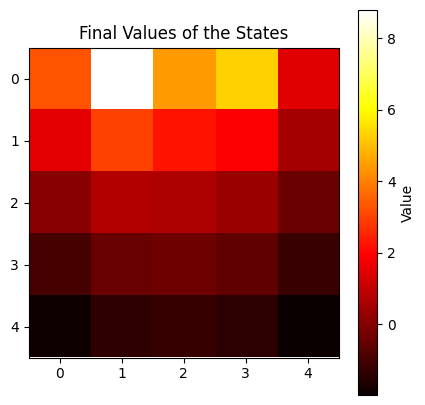

[[ 3.3  8.8  4.4  5.3  1.5]
 [ 1.5  3.   2.3  1.9  0.5]
 [ 0.1  0.7  0.7  0.4 -0.4]
 [-1.  -0.4 -0.4 -0.6 -1.2]
 [-1.9 -1.3 -1.2 -1.4 -2. ]]


In [18]:
# Create the environment and agent
env = Environment()
agent = Agent(env)

# Perform value iteration
agent.value_iteration()
agent.plot_values()

# Print the final values
np.set_printoptions(precision=1, suppress=True)
print(agent.values)

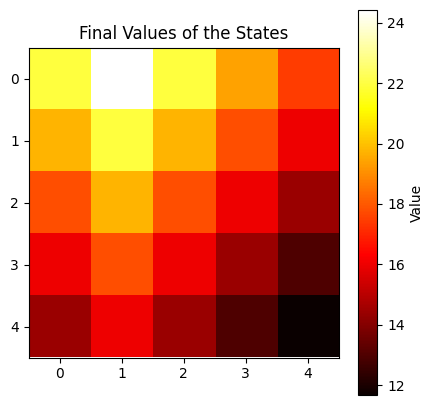

[[22.  24.4 22.  19.4 17.5]
 [19.8 22.  19.8 17.8 16. ]
 [17.8 19.8 17.8 16.  14.4]
 [16.  17.8 16.  14.4 13. ]
 [14.4 16.  14.4 13.  11.7]]


In [19]:
env = Environment()
agent = Agent(env)
# Perform value iteration with Bellman optimality equation
agent.value_iteration_optimality()
agent.plot_values()

# Print the final values
np.set_printoptions(precision=1, suppress=True)
print(agent.values)